In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Load the Dataset**

In [4]:
import pandas as pd

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/DATASET/LandslideInventory_FarWesternNepal_Points.xlsx")
print("Dataset loaded successfully.")
df.head()


Dataset loaded successfully.


,OBJECTID,Join_Count,TARGET_FID,Join_Cou_1,TARGET_F_1,Id,gridcode,Year,Area,Depth,Depth_DEM_,Depth_DEM1,SHAPE_Area,AreaCode_1,ORIG_FID,Elevation,Slope,GeologyCod,PopChange
0,1,1,1481,1,1481,7,1,1998,0.61064,Shallow,12.2747,9.71829,4193.173596,16,1481,2700,50.2511,2,0.110054
1,2,1,1049,1,1049,4,1,1997,1005.93000,Depth,0.0000,0.00000,142600.864761,16,1049,2900,34.2272,5,0.050928
2,3,2,1050,1,1050,16,1,1997,1743.64000,Shallow,18.8573,18.64040,19785.835404,16,1050,2609,36.3153,4,0.183087
3,4,2,1051,1,1051,21,1,1997,2936.23000,Shallow,18.8573,18.64040,19785.835404,16,1051,2545,45.0057,4,0.261695
4,5,1,1052,1,1052,25,1,1997,621.93300,Shallow,18.8573,18.64040,19785.835404,16,1052,2482,52.6377,4,0.238015


**Explore the Dataset**

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Join_Count  8778 non-null   int64  
 1   Join_Cou_1  8778 non-null   int64  
 2   TARGET_F_1  8778 non-null   int64  
 3   Area        8778 non-null   float64
 4   Depth       8778 non-null   int64  
 5   Depth_DEM_  8778 non-null   float64
 6   Depth_DEM1  8778 non-null   float64
 7   SHAPE_Area  8778 non-null   float64
 8   AreaCode_1  8778 non-null   int64  
 9   ORIG_FID    8778 non-null   int64  
 10  Elevation   8778 non-null   int64  
 11  Slope       8778 non-null   float64
 12  GeologyCod  8778 non-null   int64  
 13  PopChange   8778 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 960.2 KB

Statistical Summary:
        Join_Count   Join_Cou_1   TARGET_F_1           Area        Depth  \
count  8778.000000  8778.000000  8778.000000    8778.000000  8778.000000 

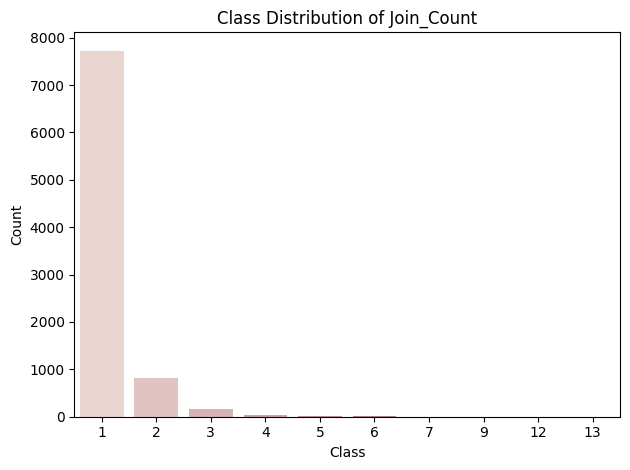

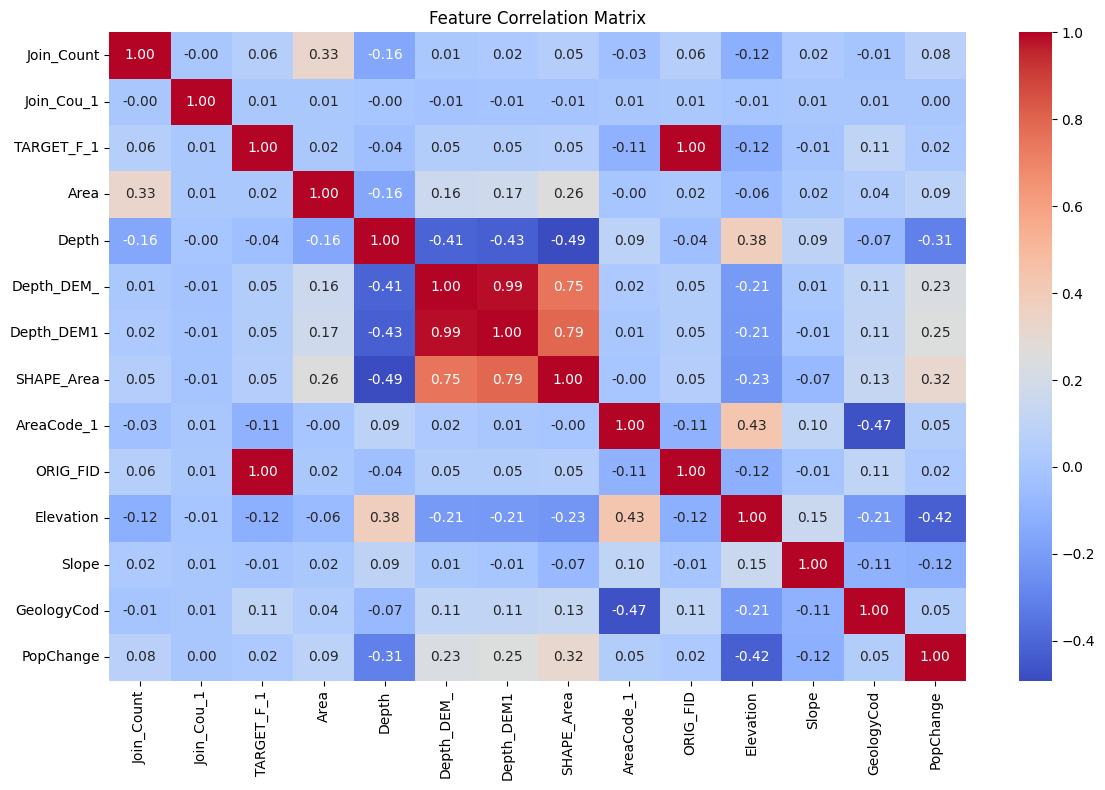

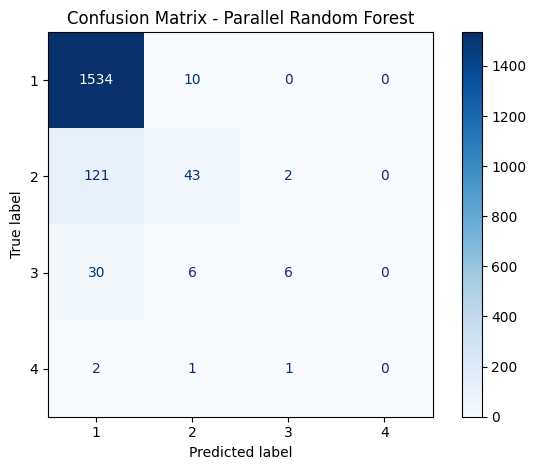

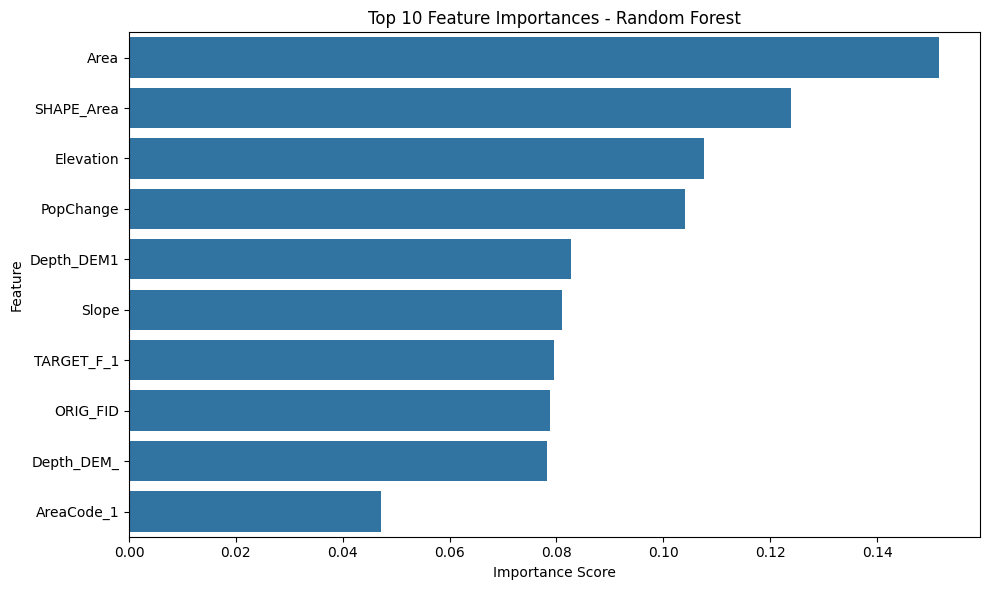

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Dataset info and summary
print("Dataset Info:")
df.info()
print("\nStatistical Summary:")
print(df.describe())

# 1. Class Distribution
if 'Join_Count' in df.columns:
    print("\nJoin_Count Class Distribution:")
    print(df['Join_Count'].value_counts())
    sns.countplot(x='Join_Count', hue='Join_Count', data=df, legend=False)
    plt.title("Class Distribution of Join_Count")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# 3. Confusion Matrix (Parallel Model)
ConfusionMatrixDisplay.from_estimator(rf_parallel, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Parallel Random Forest")
plt.tight_layout()
plt.show()

# 4. Top 10 Feature Importances
importances = rf_parallel.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances[:10], y=sorted_features[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Preprocess the Dataset

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the dataset
df = pd.read_excel('/content/drive/MyDrive/DATASET/LandslideInventory_FarWesternNepal_Points.xlsx')
print(" Dataset loaded successfully.")

# 1.1 Print column names for verification
print(" Dataset Columns:", df.columns.tolist())

# 2. Drop irrelevant or ID-based columns
cols_to_drop = ['OBJECTID', 'Id', 'TARGET_FID', 'Year', 'gridcode']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print(" Irrelevant columns dropped.")

# 3. Drop empty columns and rows with missing values
df = df.dropna(axis=1, how='all')
df = df.dropna()
print(" Missing values removed.")

# 4. Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(" Categorical columns encoded.")

# 5. Define features (X) and target label (y)
TARGET_COLUMN = 'Join_Count'
if TARGET_COLUMN in df.columns:
    y = df[TARGET_COLUMN]
    X = df.drop(TARGET_COLUMN, axis=1)
    print(f" Target column '{TARGET_COLUMN}' found and used.")
else:
    raise ValueError(f" Column '{TARGET_COLUMN}' not found in the dataset.")

# 6. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(" Features standardized.")

# 7. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(" Train-test split complete. Preprocessing finished.")


 Dataset loaded successfully.
 Dataset Columns: ['OBJECTID', 'Join_Count', 'TARGET_FID', 'Join_Cou_1', 'TARGET_F_1', 'Id', 'gridcode', 'Year', 'Area', 'Depth', 'Depth_DEM_', 'Depth_DEM1', 'SHAPE_Area', 'AreaCode_1', 'ORIG_FID', 'Elevation', 'Slope', 'GeologyCod', 'PopChange']
 Irrelevant columns dropped.
 Missing values removed.
 Categorical columns encoded.
 Target column 'Join_Count' found and used.
 Features standardized.
 Train-test split complete. Preprocessing finished.


**Train Serial and Parallel Random Forest**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Serial model
start_time = time.time()
rf_serial = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)
rf_serial.fit(X_train, y_train)
serial_time = time.time() - start_time
y_pred_serial = rf_serial.predict(X_test)
acc_serial = accuracy_score(y_test, y_pred_serial)

print("🔹 Serial Model (n_jobs=1)")
print(f"Training Time: {serial_time:.4f} seconds")
print(f"Accuracy: {acc_serial:.4f}")
print("Classification Report (Serial):\n", classification_report(y_test, y_pred_serial, zero_division=0))
print("Confusion Matrix (Serial):\n", confusion_matrix(y_test, y_pred_serial))

🔹 Serial Model (n_jobs=1)
Training Time: 1.5795 seconds
Accuracy: 0.9015
Classification Report (Serial):
               precision    recall  f1-score   support

           1       0.91      0.99      0.95      1544
           2       0.72      0.26      0.38       166
           3       0.67      0.14      0.24        42
           4       0.00      0.00      0.00         4

    accuracy                           0.90      1756
   macro avg       0.57      0.35      0.39      1756
weighted avg       0.88      0.90      0.88      1756

Confusion Matrix (Serial):
 [[1534   10    0    0]
 [ 121   43    2    0]
 [  30    6    6    0]
 [   2    1    1    0]]


In [16]:
# Parallel model
start_time = time.time()
rf_parallel = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_parallel.fit(X_train, y_train)
parallel_time = time.time() - start_time
y_pred_parallel = rf_parallel.predict(X_test)
acc_parallel = accuracy_score(y_test, y_pred_parallel)

print("\n🔸 Parallel Model (n_jobs=-1)")
print(f"Training Time: {parallel_time:.4f} seconds")
print(f"Accuracy: {acc_parallel:.4f}")
print("Classification Report (Parallel):\n", classification_report(y_test, y_pred_parallel, zero_division=0))
print("Confusion Matrix (Parallel):\n", confusion_matrix(y_test, y_pred_parallel))


🔸 Parallel Model (n_jobs=-1)
Training Time: 1.0304 seconds
Accuracy: 0.9015
Classification Report (Parallel):
               precision    recall  f1-score   support

           1       0.91      0.99      0.95      1544
           2       0.72      0.26      0.38       166
           3       0.67      0.14      0.24        42
           4       0.00      0.00      0.00         4

    accuracy                           0.90      1756
   macro avg       0.57      0.35      0.39      1756
weighted avg       0.88      0.90      0.88      1756

Confusion Matrix (Parallel):
 [[1534   10    0    0]
 [ 121   43    2    0]
 [  30    6    6    0]
 [   2    1    1    0]]


**Model Evaulation Summary**

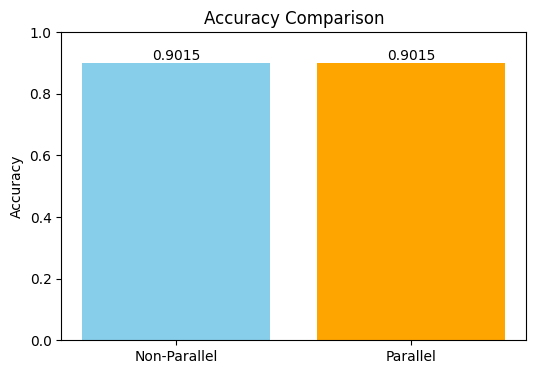

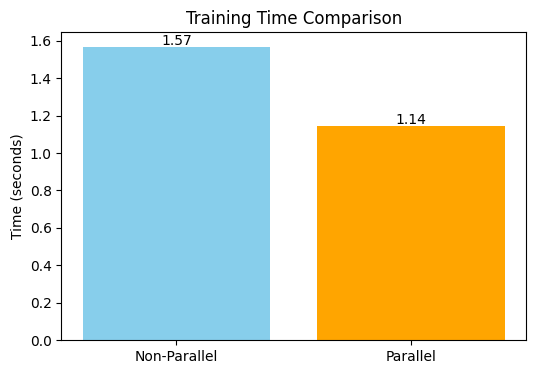

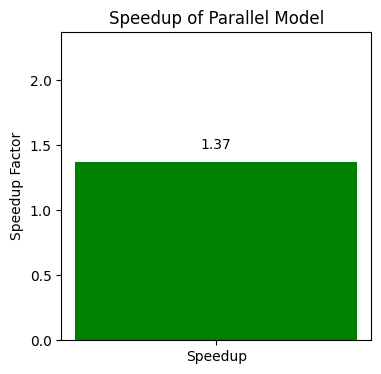


 Model Evaluation Summary:
Non-Parallel Accuracy: 0.9015
Parallel Accuracy: 0.9015
Non-Parallel Training Time (s): 1.5666
Parallel Training Time (s): 1.1437
Speedup: 1.3698


In [14]:
import matplotlib.pyplot as plt

# Assuming acc_serial, acc_parallel, serial_time, and parallel_time are defined above

# Ensure speedup is initialized before plotting
speedup = 0  # Initialize speedup

# Plot 1: Accuracy Comparison
labels = ['Non-Parallel', 'Parallel']
accuracies = [acc_serial, acc_parallel]
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['skyblue', 'orange'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

# Plot 2: Training Time Comparison
times = [serial_time, parallel_time]
plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['skyblue', 'orange'])
plt.title("Training Time Comparison")
plt.ylabel("Time (seconds)")
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

# Plot 3: Speedup Visualization
if parallel_time > 0:
    speedup = serial_time / parallel_time

plt.figure(figsize=(4, 4))
plt.bar(["Speedup"], [speedup], color='green')
plt.title("Speedup of Parallel Model")
plt.ylabel("Speedup Factor")
plt.ylim(0, speedup + 1)
plt.text(0, speedup + 0.1, f"{speedup:.2f}", ha='center')
plt.show()

# TEXT OUTPUT
print("\n Model Evaluation Summary:")
print(f"Non-Parallel Accuracy: {acc_serial:.4f}")
print(f"Parallel Accuracy: {acc_parallel:.4f}")
print(f"Non-Parallel Training Time (s): {serial_time:.4f}")
print(f"Parallel Training Time (s): {parallel_time:.4f}")

# Speedup calculation (already handled above)
if parallel_time > 0:
    print(f"Speedup: {speedup:.4f}")
else:
    print("Speedup: Undefined (parallel time = 0)")
